# Analyzing the community activity for version control systems

### Context
* You are a new team member in a software company
* The developers there are using CVS (Concurrent Versions System)
* You propose Git as an alternative to the team. 

Find evidence that shows that the software development community is mainly adopting the Git version control system!

### The Dataset

There is a dataset Stack Overflow available with the following data:

* `CreationDate`: the timestamp of the creation date of a Stack Overflow post (= question)
* `TagName`: the tag name for a technology (in our case for only 4 VCSes: "cvs", "svn", "git" and "mercurial")
* `ViewCount`: the numbers of views of a post

These are the first 10 entries of this dataset:

```
CreationDate,TagName,ViewCount
2008-08-01 13:56:33,svn,10880
2008-08-01 14:41:24,svn,55075
2008-08-01 15:22:29,svn,15144
2008-08-01 18:00:13,svn,8010
2008-08-01 18:33:08,svn,92006
2008-08-01 23:29:32,svn,2444
2008-08-03 22:38:29,svn,871830
2008-08-03 22:38:29,git,871830
2008-08-04 11:37:24,svn,17969
```

## Analysis

### Step 1: Load in the dataset

In [1]:
import pandas as pd

vcs_data = pd.read_csv('../dataset/stackoverflow_vcs_data_subset.gz')
vcs_data.head()

,CreationDate,TagName,ViewCount
0,2008-08-01 13:56:33,svn,10880
1,2008-08-01 14:41:24,svn,55075
2,2008-08-01 15:22:29,svn,15144
3,2008-08-01 18:00:13,svn,8010
4,2008-08-01 18:33:08,svn,92006


### Step 2: Convert the `CreationDate` column to a real datetime datatype

In [2]:
vcs_data['CreationDate'] = pd.to_datetime(vcs_data['CreationDate'])
vcs_data.head()

,CreationDate,TagName,ViewCount
0,2008-08-01 13:56:33,svn,10880
1,2008-08-01 14:41:24,svn,55075
2,2008-08-01 15:22:29,svn,15144
3,2008-08-01 18:00:13,svn,8010
4,2008-08-01 18:33:08,svn,92006


### Step 3: Sum up the number of views in `ViewCount` by the timestamp and the VCSes

In [3]:
number_of_views = vcs_data.groupby(['CreationDate', 'TagName']).sum()
number_of_views.head()

,,ViewCount
CreationDate,TagName,
2008-08-01 13:56:33,svn,10880
2008-08-01 14:41:24,svn,55075
2008-08-01 15:22:29,svn,15144
2008-08-01 18:00:13,svn,8010
2008-08-01 18:33:08,svn,92006


### Step 4: List the number of views for each VCS in separate columns

In [4]:
views_per_vcs = number_of_views.unstack()['ViewCount']
views_per_vcs.head()

TagName,cvs,git,mercurial,svn
CreationDate,,,,
2008-08-01 13:56:33,NaN,NaN,NaN,10880.0
2008-08-01 14:41:24,NaN,NaN,NaN,55075.0
2008-08-01 15:22:29,NaN,NaN,NaN,15144.0
2008-08-01 18:00:13,NaN,NaN,NaN,8010.0
2008-08-01 18:33:08,NaN,NaN,NaN,92006.0


### Step 5: Accumulate the number of views for the VCSes for every month

In [5]:
monythly_views = views_per_vcs.resample("1M").sum().cumsum()
monythly_views.head()

TagName,cvs,git,mercurial,svn
CreationDate,,,,
2008-08-31,165811.0,2502424.0,755846.0,3488439.0
2008-09-30,428713.0,15224415.0,891127.0,11405500.0
2008-10-31,637236.0,25672697.0,1114432.0,14295198.0
2008-11-30,752735.0,32492475.0,1184003.0,15848089.0
2008-12-31,878710.0,37829614.0,1222065.0,18256764.0


### Step 6: Visualize the monthly views over time for all VCSes

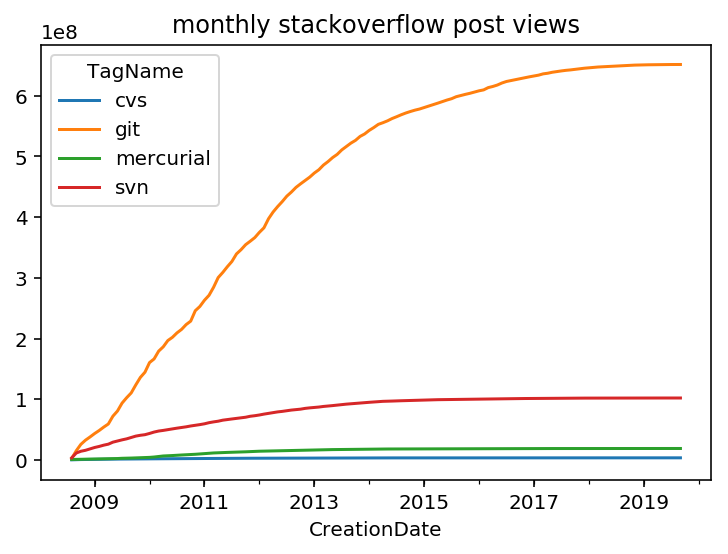

In [6]:
%matplotlib inline
monythly_views.plot(title="monthly stackoverflow post views");

## Discussion

What are your conclusions? Discuss!